# Item-based collaborative filtering

In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)

columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|', names=columns, encoding='latin-1')

movie_names = movies[['item_id', 'movie title']]

combined_movies_data = pd.merge(df, movie_names, on='item_id')

combined_movies_data.head()

,user_id,item_id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [11]:
rating_crosstab = combined_movies_data.pivot_table(values='rating', index='user_id', columns='movie title', fill_value=0)
rating_crosstab.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,...,0,0,0,4,0,0,0,0,4,0


In [18]:
X = rating_crosstab.T
X.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus and Roxanne (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
SVD = TruncatedSVD(n_components=12, random_state=5)

resultant_matrix = SVD.fit_transform(X)

print(resultant_matrix)
resultant_matrix.shape

[[ 1.03999361e+00  6.59901276e-01  4.56884896e-02 ... -7.71937108e-01
  -3.31055347e-01 -4.02837195e-01]
 [ 4.36584337e-01 -2.57258303e-01  3.52958430e-01 ... -2.35888447e-01
   3.78433076e-01 -7.85592809e-02]
 [ 1.25437438e+01  5.66918122e+00 -4.90782817e+00 ...  3.91270237e+00
   5.71006932e-01 -8.20014552e-01]
 ...
 [ 3.58929614e-01  3.71251484e-01  2.29708821e-02 ... -6.97748644e-02
   1.93470357e-01 -2.08347480e-02]
 [ 1.42428013e+00  8.14960255e-01 -4.90232788e-01 ...  1.35831647e-01
   5.82105764e-01 -5.66692503e-01]
 [ 2.29210339e-01 -6.22305807e-03  2.73170751e-01 ...  6.27062235e-02
  -3.66968366e-02 -1.67296738e-01]]


(1664, 12)

In [7]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(1664, 1664)

In [8]:
col_idx = rating_crosstab.columns.get_loc("Return of the Jedi (1983)")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Movies': rating_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Movies
1234,1.000000,Return of the Jedi (1983)
1398,0.988052,Star Wars (1977)
1523,0.957117,Toy Story (1995)
1460,0.944972,Terminator 2: Judgment Day (1991)
1394,0.928116,Star Trek: First Contact (1996)
1461,0.927263,"Terminator, The (1984)"
456,0.922480,"Empire Strikes Back, The (1980)"
414,0.919192,Die Hard (1988)
1205,0.912435,Raiders of the Lost Ark (1981)
964,0.911730,Men in Black (1997)


In [11]:
col_idx = rating_crosstab.columns.get_loc("Godfather, The (1972)")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Movies': rating_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Movies
612,1.000000,"Godfather, The (1972)"
613,0.921444,"Godfather: Part II, The (1974)"
498,0.921420,Fargo (1996)
623,0.900758,GoodFellas (1990)
237,0.865385,"Bronx Tale, A (1993)"
1398,0.865148,Star Wars (1977)
209,0.864269,"Boot, Das (1981)"
389,0.857308,Dead Man Walking (1995)
622,0.845558,"Good, The Bad and The Ugly, The (1966)"
1190,0.842705,Pulp Fiction (1994)


In [12]:
col_idx = rating_crosstab.columns.get_loc("Pulp Fiction (1994)")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Movies': rating_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Movies
1190,1.000000,Pulp Fiction (1994)
1572,0.974919,"Usual Suspects, The (1995)"
571,0.971153,Full Metal Jacket (1987)
1329,0.969588,"Silence of the Lambs, The (1991)"
623,0.967830,GoodFellas (1990)
1534,0.960617,True Romance (1993)
1183,0.959133,"Professional, The (1994)"
1231,0.953570,Reservoir Dogs (1992)
1301,0.951028,Seven (Se7en) (1995)
1440,0.943573,Swimming with Sharks (1995)


# User-based collaborative filtering

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [28]:
movies = pd.read_csv("movies.csv",encoding="Latin1")
Ratings = pd.read_csv("ratings.csv")
Tags = pd.read_csv("tags.csv",encoding="Latin1")

In [29]:
print(movies.head())
print(Ratings.head())
print(Tags.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0   12882        1     4.0  1147195252
1   12882       32     3.5  1147195307
2   12882       47     5.0  1147195343
3   12882       50     5.0  1147185499
4   12882      110     4.5  1147195239
   movieId  userId           tag   timestamp
0     3916   12882        sports  1147195545
1     4085   12882  Eddie Murphy  1147195966
2    33660   12882        boxing  11

In [30]:
Mean = Ratings.groupby(by="userId", as_index=False)['rating'].mean()
Rating_avg = pd.merge(Ratings, Mean, on='userId')
Rating_avg['adg_rating'] = Rating_avg['rating_x'] - Rating_avg['rating_y']
print(Rating_avg.head())

   userId  movieId  rating_x   timestamp  rating_y  adg_rating
0   12882        1       4.0  1147195252  4.061321   -0.061321
1   12882       32       3.5  1147195307  4.061321   -0.561321
2   12882       47       5.0  1147195343  4.061321    0.938679
3   12882       50       5.0  1147185499  4.061321    0.938679
4   12882      110       4.5  1147195239  4.061321    0.438679


In [31]:
check = pd.pivot_table(Rating_avg,values='rating_x',index='userId',columns='movieId')
print(check.head())
final = pd.pivot_table(Rating_avg,values='adg_rating',index='userId',columns='movieId')
print(final.head())

movieId  1       2       3       4       5       6       7       9       \
userId                                                                    
316         2.5     NaN     NaN     NaN     NaN     NaN     2.0     NaN   
320         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
359         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   
370         4.5     4.0     NaN     NaN     NaN     5.0     NaN     NaN   
910         5.0     4.0     3.5     NaN     3.5     3.5     NaN     NaN   

movieId  10      11      ...  106487  106489  106782  106920  109374  109487  \
userId                   ...                                                   
316         2.5     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
320         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
359         4.0     4.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
370         NaN     NaN  ...     2.5     3.0     4.5     4.0     NaN     N

In [32]:
# Replacing NaN by Movie Average
final_movie = final.fillna(final.mean(axis=0))
print(final_movie.head())

# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
print(final_user.head())

movieId    1         2         3         4         5         6         7       \
userId                                                                          
316     -0.829457 -0.436518 -0.468109 -0.770223 -0.615331  0.320415 -1.329457   
320      0.200220 -0.436518 -0.468109 -0.770223 -0.615331  0.320415 -0.203889   
359      1.314526 -0.436518 -0.468109 -0.770223 -0.615331  1.314526 -0.203889   
370      0.705596  0.205596 -0.468109 -0.770223 -0.615331  1.205596 -0.203889   
910      1.101920  0.101920 -0.398080 -0.770223 -0.398080 -0.398080 -0.203889   

movieId    9         10        11      ...    106487    106489    106782  \
userId                                 ...                                 
316     -0.690175 -0.829457 -0.094277  ...  0.105075  0.006629  0.262314   
320     -0.690175 -0.150642 -0.094277  ...  0.105075  0.006629  0.262314   
359     -0.690175  0.314526  0.314526  ...  0.105075  0.006629  0.262314   
370     -0.690175 -0.150642 -0.094277  ... -1.294404

In [33]:
# user similarity on replacing NAN by item(movie) avg
cosine = cosine_similarity(final_movie)
np.fill_diagonal(cosine, 0)
similarity_with_movie = pd.DataFrame(cosine, index=final_movie.index)
similarity_with_movie.columns = final_user.index
# print(similarity_with_movie.head())

# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
# print(similarity_with_user.head())

In [34]:
def get_user_similar_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.userId == user1].merge(
    Rating_avg[Rating_avg.userId == user2],
    on = "movieId",
    how = "inner" )
    return common_movies.merge( movies, on = 'movieId' )

a = get_user_similar_movies(370,86309)
a = a.loc[ : , ['rating_x_x','rating_x_y','title']]
print(a.head())

   rating_x_x  rating_x_y                                              title
0         5.0         5.0                                 Matrix, The (1999)
1         5.0         4.5  Lord of the Rings: The Fellowship of the Ring,...
2         5.0         4.0      Lord of the Rings: The Two Towers, The (2002)
3         4.5         4.0  Lord of the Rings: The Return of the King, The...
4         1.5         1.0                                    Serenity (2005)


In [35]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
print(sim_user_30_u.head())

sim_user_30_m = find_n_neighbours(similarity_with_movie,30)
print(sim_user_30_m.head())

          top1    top2    top3   top4    top5    top6    top7    top8   top9  \
userId                                                                         
316     113673  117918    9050  12882   38187  102668   98880   43829  13215   
320      12288  113673   28159  79846  134627  112948  120729   97163   2945   
359     102118   96482  102532  50898    2702   60016   23428  120782  57937   
370      46645   42245   40768  23428  123707   60016   45120  113645  97195   
910      87042  131620   67352  40768   31321   48821   26222   63295   5611   

         top10  ...   top21   top22   top23   top24  top25   top26   top27  \
userId          ...                                                          
316      78501  ...   88608  120782   74472   53834  88928   42245   58265   
320       4931  ...   39271   94883  127683  101137  54989  134521   80946   
359      42096  ...  117258    7723  120729   61305  40768  117918   86768   
370     102118  ...    5611   20530    2702   381

In [36]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_movie.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_movie.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

score = User_item_score(320,7371)
print("score (u,i) is",score)

score (u,i) is 4.255766437391595


In [37]:
Rating_avg = Rating_avg.astype({"movieId": str})
Movie_user = Rating_avg.groupby(by = 'userId')['movieId'].apply(lambda x:','.join(x))

def User_item_score1(user):
    Movie_seen_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    d = Movie_user[Movie_user.index.isin(b)]
    l = ','.join(d.values)
    Movie_seen_by_similar_users = l.split(',')
    Movies_under_consideration = list(set(Movie_seen_by_similar_users)-set(list(map(str, Movie_seen_by_user))))
    Movies_under_consideration = list(map(int, Movies_under_consideration))
    score = []
    for item in Movies_under_consideration:
        c = final_movie.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['userId'] == user,'rating'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_movie.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'movieId':Movies_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Movie_Name = top_5_recommendation.merge(movies, how='inner', on='movieId')
    Movie_Names = Movie_Name.title.values.tolist()
    return Movie_Names

user = int(input("Enter the user id to whom you want to recommend : "))
predicted_movies = User_item_score1(user)
print(" ")
print("The Recommendations for User Id : 370")
print("   ")
for i in predicted_movies:
    print(i)

Enter the user id to whom you want to recommend : 370
 
The Recommendations for User Id : 370
   
Band of Brothers (2001)
Godfather: Part II, The (1974)
Wallace & Gromit: The Wrong Trousers (1993)
Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)
Spirited Away (Sen to Chihiro no kamikakushi) (2001)


# Content based recommender system

In [1]:
import pandas as pd
import ast 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_data = pd.read_csv('data/movies_metadata.csv', low_memory=False)
print(df_data)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

C:\Users\MyPC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of vote counts')

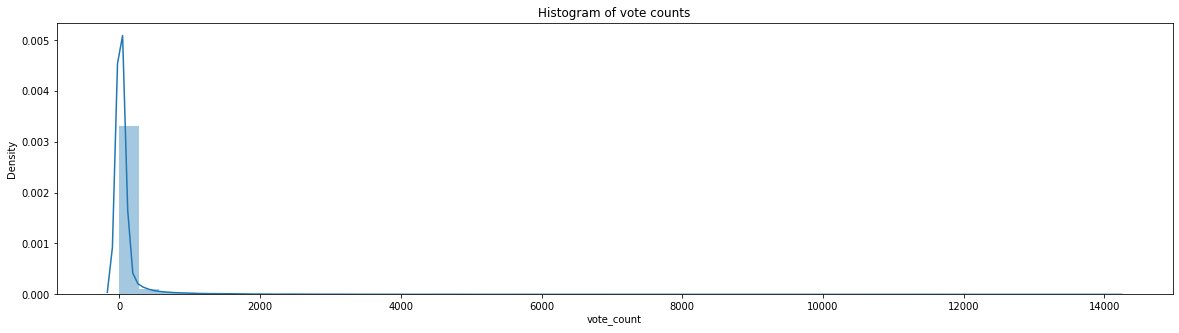

In [8]:
df_data = df_data[df_data['vote_count'].notna()]


plt.figure(figsize=(20,5))
 
sns.distplot(df_data['vote_count'])
 
plt.title("Histogram of vote counts")

In [12]:
min_votes = np.percentile(df_data['vote_count'].values, 85)

82.0


In [56]:
df = df_data.copy(deep=True).loc[df_data['vote_count'] > min_votes]
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [57]:
# removing rows with missing overview
 
df = df[df['overview'].notna()]

df.reset_index(inplace=True)

 
def process_text(text):
 
    # replace multiple spaces with one
 
    text = ' '.join(text.split())
 
    # lowercase
 
    text = text.lower()
 
    return text
 
df['overview'] = df.apply(lambda x: process_text(x.overview),axis=1)
df.head()

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
4,5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [68]:
tf_idf = TfidfVectorizer(stop_words='english')
 
tf_idf_matrix = tf_idf.fit_transform(df['overview']);

tf_idf_matrix

0    led by woody, andy's toys live happily in his ...
1    when siblings judy and peter discover an encha...
2    a family wedding reignites the ancient feud be...
3    just when george banks has recovered from his ...
4    obsessive master thief, neil mccauley leads a ...
Name: overview, dtype: object

In [62]:
# calculating cosine similarity between movies
 
cosine_similarity_matrix = cosine_similarity(tf_idf_matrix, tf_idf_matrix)

In [ ]:
def index_from_title(df,title):
 
    return df[df['original_title']==title].index.values[0]
 

def title_from_index(df,index):
 
    return df[df.index==index].original_title.values[0]
 

def recommendations( original_title, df,cosine_similarity_matrix,number_of_recommendations):
 
    index = index_from_title(df,original_title)
 
    similarity_scores = list(enumerate(cosine_similarity_matrix[index]))
 
    similarity_scores_sorted = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
 
    recommendations_indices = [t[0] for t in similarity_scores_sorted[1:(number_of_recommendations+1)]]
 
    return df['original_title'].iloc[recommendations_indices]

In [61]:
recommendations('Batman', df, cosine_similarity_matrix, 10)

NameError: name 'recommendations' is not defined